# Pytorch Puerta OR

Este Colab demuestra cómo hacer una puerta OR simple entrenando una red neuronal en Pytorch

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autog
import matplotlib.pyplot as plt

## Ejemplos y etiquetas

Una [puerta OR](https://en.wikipedia.org/wiki/OR_gate) toma dos entradas, p y q, y devuelve una salida. Una puerta OR simplemente devuelve "verdadero" si al menos una señal de entrada (p o q) es verdadera. Aquí está la tabla de verdad:

| p | q | p∨q |
|:-:|:-:|:-:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |


In [2]:
# Datos
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_data = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

In [3]:
# Parametros
input_dim = 2
hidden_dim = 4
output_dim = 1
epochs = 100
l_rate = 0.1

# Modelo
class NeuralNet(nn.Module):
  def __init__(self, input_size, output_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_dim)
    self.linear2 = nn.Linear(hidden_dim, output_size)
  def forward(self, x):
    output = torch.sigmoid(self.linear1(x))
    output = torch.sigmoid(self.linear2(output))
    return output
  def fit(self, x, y, optimizer, criterion, epochs, nprint=None):
    if nprint is None:
      nprint=epochs/5
    vLoss=[]
    vAcc=[]
    # Accuracy
    for epoch in range(epochs):
      pred = model(x)
      loss = criterion(pred, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      if (epoch + 1) % nprint == 0:
        print("Epoch %d  Loss %.3f" %(epoch + 1, loss.item()))
      # Estadisticas
      vLoss.append((loss.detach()/len(x)).numpy())
      vAcc.append((torch.sum(pred.round() == y)/len(x)).detach().numpy())
    return {'loss':vLoss, 'accuracy':vAcc}

model = NeuralNet(input_dim, output_dim)
print(model.eval())
#criterion = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=l_rate)

NeuralNet(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


## Entrenar al modelo

Entrenemos el modelo y veamos qué tan bien converge.

In [4]:
history = model.fit(x_data, y_data, optimizer=optim.Adam(model.parameters(), lr=l_rate), criterion=nn.MSELoss(), epochs=epochs)

Epoch 20  Loss 0.107
Epoch 40  Loss 0.002
Epoch 60  Loss 0.000
Epoch 80  Loss 0.000
Epoch 100  Loss 0.000


### Métricas de entrenamiento


dict_keys(['loss', 'accuracy'])


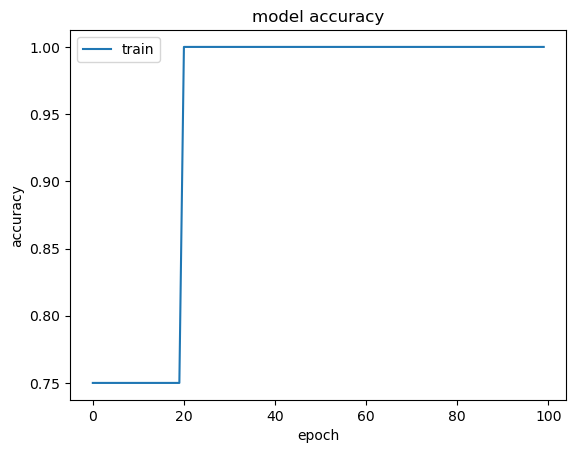

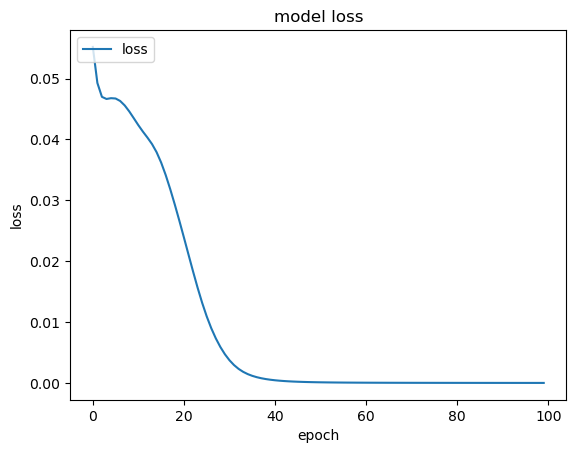

In [5]:
print(history.keys())
# summarize history for accuracy
plt.plot(history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
#plt.plot(history.history['mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

## Predecir la salida

Los ejemplos también se utilizan para realizar predicciones. De esta manera podemos verificar que el modelo ha convergido.

In [6]:
# Prediction individual
for x, y in zip(x_data, y_data):
  pred = model(x)
  print("Pred", list(map(int, x)), "=", int(pred.round()), "\t", float(pred),  "\tReal", int(y))

Pred [0, 0] = 0 	 0.019327281042933464 	Real 0
Pred [0, 1] = 1 	 0.9865597486495972 	Real 1
Pred [1, 0] = 1 	 0.9868729710578918 	Real 1
Pred [1, 1] = 1 	 0.9970322847366333 	Real 1


In [7]:
# Test: Predecir [1 o 1]
pred = model(torch.FloatTensor([1, 1]))
print("Pred [1, 1] =", int(pred.round()), "\t", float(pred))

Pred [1, 1] = 1 	 0.9970322847366333
